# Predictive Analytics for Retail Banking

**Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**


The data is from a marketing campaign designed to pick customers with a higher than normal propensity to uptake a term deposit offer.  A term deposit is a deposit that a financial institution offers with a high fixed rate and a fixed maturity date.  There are two datasets that we investigated:

The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM). The classification goal is to predict if the client will subscribe a term deposit (variable y).

There are 16 input variables:

**Client data:**
1.   age (*numeric*)
2.   job : type of job (*categorical*: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
3.   marital : marital status (*categorical*: "married","divorced","single"; note: "divorced" means divorced or widowed)
4.   education (*categorical*: "unknown","secondary","primary","tertiary")
5.   default: has credit in default? (*binary*: "yes","no")
6.   balance: average yearly balance, in euros (*numeric*) 
7.   housing: has housing loan? (*binary*: "yes","no")
8.   loan: has personal loan? (*binary*: "yes","no")

**Campaign data:**

9.   contact: contact communication type (*categorical*: "unknown","telephone","cellular")
10.   day: last contact day of the month (*numeric*)
11.   month: last contact month of year (*categorical*: "jan", "feb", "mar", ..., "nov", "dec")
12.   duration: last contact duration, in seconds (*numeric*)

**Other attributes:**

13.   campaign: number of contacts performed during this campaign and for this client (*numeric*, includes last contact)
14.   pdays: number of days that passed by after the client was last contacted from a previous campaign (*numeric*: -1 means client was not previously contacted)
15.   previous: (*numeric*: number of contacts performed before this campaign and for this client) 
16.   poutcome: outcome of the previous marketing campaign (*categorical*: "unknown","other","failure","success")

**Target variable:**

17.   deposite - has the client subscribed a term deposit? (*binary*: "yes","no")



In [1]:
#import pacakges
import numpy as np
import pandas as pd

In [2]:
#read data
data=pd.read_csv('bank.csv')

# Basic check

In [3]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,NaN,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [4]:
# check total rows and columns in data
data.shape

(11163, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11163 non-null  int64 
 1   job        11163 non-null  object
 2   marital    11163 non-null  object
 3   education  11163 non-null  object
 4   fault      11163 non-null  object
 5   balance    11163 non-null  int64 
 6   housing    11163 non-null  object
 7   loan       11163 non-null  object
 8   contact    11163 non-null  object
 9   day        11163 non-null  int64 
 10  month      11163 non-null  object
 11  duration   11163 non-null  int64 
 12  campaign   11163 non-null  int64 
 13  pdays      11163 non-null  int64 
 14  previous   11163 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11163 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,41.233539,1528.611484,15.657081,372.053839,2.508286,51.325719,0.832482
std,11.914022,3225.278053,8.420967,347.170757,2.721993,108.754538,2.291918
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.500000,22.000000,496.000000,3.000000,20.500000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
## check for duplicates
duplicateRows=data[data.duplicated(keep='last')]

In [8]:
data.drop_duplicates(keep='last',inplace=True)

In [9]:
# null value check
data.isna().sum()

age          0
job          0
marital      0
education    0
fault        0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64

In [10]:
len(data.index)

11162

In [11]:
# null value check
round(100*data.isna().sum()/len(data.index),2)

age          0.00
job          0.00
marital      0.00
education    0.00
fault        0.00
balance      0.00
housing      0.00
loan         0.00
contact      0.00
day          0.00
month        0.00
duration     0.00
campaign     0.00
pdays        0.00
previous     0.00
poutcome     0.01
deposit      0.00
dtype: float64

In [12]:
# drop null value
data.dropna(subset=['poutcome'],inplace=True)

## Assignment 1 : 
1. impute the null value with most frequent category
2. impute the null value when column in numerical


In [13]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


# Outlier Detection

In [14]:
numerics=['int64']
outlier_chk_features=data.select_dtypes(include=numerics)

In [15]:
data.describe(percentiles=[.25,.50,.80,.90])

,age,balance,day,duration,campaign,pdays,previous
count,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000
mean,41.230624,1528.671445,15.658991,371.895708,2.508557,51.335095,0.832631
std,11.913083,3225.527257,8.420512,346.989140,2.722162,108.762026,2.292096
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
80%,52.000000,2223.000000,24.000000,585.000000,3.000000,95.000000,1.000000
90%,58.000000,3899.000000,28.000000,838.000000,5.000000,191.000000,3.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Assignment 2 : 
1. Draw box plot for all numerical column
2. Identify and imputed the outlier


## Assignment 3 :
1. what is list coprehension
2. what is lambda function

### Examine categorical data

In [16]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 1 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11161 non-null  int64 
 1   job        11161 non-null  object
 2   marital    11161 non-null  object
 3   education  11161 non-null  object
 4   fault      11161 non-null  object
 5   balance    11161 non-null  int64 
 6   housing    11161 non-null  object
 7   loan       11161 non-null  object
 8   contact    11161 non-null  object
 9   day        11161 non-null  int64 
 10  month      11161 non-null  object
 11  duration   11161 non-null  int64 
 12  campaign   11161 non-null  int64 
 13  pdays      11161 non-null  int64 
 14  previous   11161 non-null  int64 
 15  poutcome   11161 non-null  object
 16  deposit    11161 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [18]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112360,-0.000622,-0.000161,-0.005217,0.002828,0.020210
balance,0.112360,1.000000,0.010416,0.022576,-0.013917,0.017392,0.030791
day,-0.000622,0.010416,1.000000,-0.018163,0.136956,-0.077293,-0.059026
duration,-0.000161,0.022576,-0.018163,1.000000,-0.041420,-0.027268,-0.026626
campaign,-0.005217,-0.013917,0.136956,-0.041420,1.000000,-0.102752,-0.049719
pdays,0.002828,0.017392,-0.077293,-0.027268,-0.102752,1.000000,0.507264
previous,0.020210,0.030791,-0.059026,-0.026626,-0.049719,0.507264,1.000000


### Assignment4 : Optimized the above code

In [19]:
# examine unique values
objcol=['job','marital','education','housing']
for col in objcol:
    print(col, '\n' ,data[col].unique())


job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
housing 
 ['yes' 'no']


In [20]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [21]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


# Data Visulazation

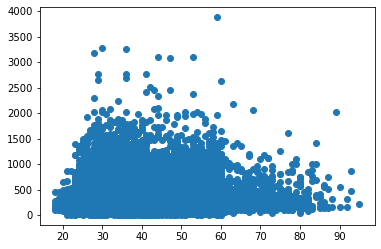

In [22]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data['age'],data['duration'])

<AxesSubplot:>

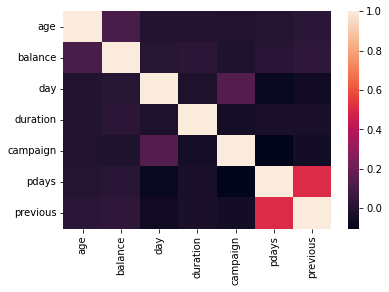

In [23]:
sns.heatmap(data.corr())

<AxesSubplot:>

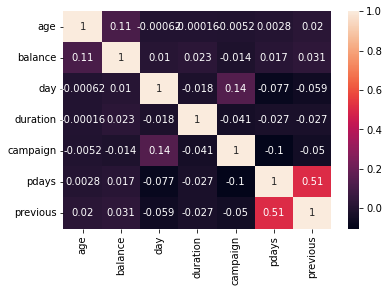

In [24]:
# heatmap with values
sns.heatmap(data.corr(), annot=True) 

Text(0.5, 1.0, 'Bar chart for Contact and Deposite')

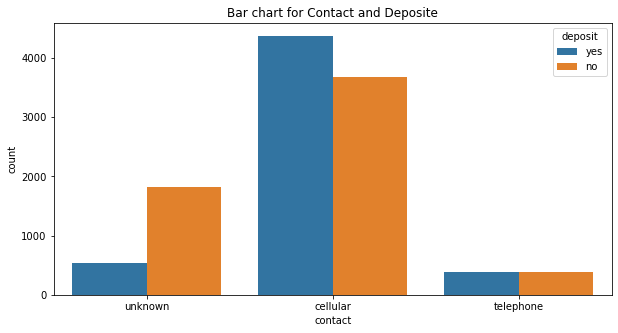

In [25]:
# bar chart
plt.figure(figsize=(10,5))
sns.countplot(x='contact',hue='deposit',data=data)
plt.title('Bar chart for Contact and Deposite')

# feature enginerring

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 1 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11161 non-null  int64 
 1   job        11161 non-null  object
 2   marital    11161 non-null  object
 3   education  11161 non-null  object
 4   fault      11161 non-null  object
 5   balance    11161 non-null  int64 
 6   housing    11161 non-null  object
 7   loan       11161 non-null  object
 8   contact    11161 non-null  object
 9   day        11161 non-null  int64 
 10  month      11161 non-null  object
 11  duration   11161 non-null  int64 
 12  campaign   11161 non-null  int64 
 13  pdays      11161 non-null  int64 
 14  previous   11161 non-null  int64 
 15  poutcome   11161 non-null  object
 16  deposit    11161 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [27]:
objcol=data.select_dtypes(include=['object']).columns.tolist()
for col in objcol:
    print(col, '\n' ,data[col].unique())

job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
fault 
 ['no' 'yes']
housing 
 ['yes' 'no']
loan 
 ['no' 'yes']
contact 
 ['unknown' 'cellular' 'telephone']
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 
 ['unknown' 'other' 'failure' 'success']
deposit 
 ['yes' 'no']


In [28]:
# convert binary category to numbers
data['fault'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [29]:
for col in ['fault','housing','loan','deposit']:
    data[col].replace(['yes','no'],[1,0],inplace=True)

In [30]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
3,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
5,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
6,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1


In [31]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [32]:
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])

In [33]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
3,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
4,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
5,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
6,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3,1


In [34]:
X=data.drop(columns='deposit')
Y=data['deposit']

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_min_max=pd.DataFrame(min_max.fit_transform(X),columns=X.columns)

In [36]:
X_min_max.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.0,0.0,1.0
1,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0,1.0,0.133333,0.727273,0.357566,0.000000,0.0,0.0,1.0
2,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0,1.0,0.133333,0.727273,0.148750,0.000000,0.0,0.0,1.0
3,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0,1.0,0.133333,0.727273,0.172983,0.016129,0.0,0.0,1.0
4,0.311688,0.363636,1.0,0.666667,0.0,0.077762,1.0,1.0,1.0,0.133333,0.727273,0.144367,0.016129,0.0,0.0,1.0


## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
X_train.shape

(7812, 16)

In [39]:
X_test.shape

(3349, 16)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [41]:
lr.fit(X_train,Y_train)

C:\Users\He336\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# make the prediction
y_pred=lr.predict(X_test)

In [43]:
print(y_pred)

[0 0 0 ... 1 1 0]


In [44]:
print(Y_test.values)

[0 0 0 ... 1 1 0]


In [45]:
lr.score(X_test,Y_test)

0.7560465810689758

In [46]:
# Accuracy check
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,Y_test)*100

75.60465810689759

In [47]:
confusion_matrix(y_pred,Y_test)

array([[1389,  483],
       [ 334, 1143]], dtype=int64)

In [48]:
X_test.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7012,55,9,1,1,0,570,0,0,0,27,1,94,6,-1,0,3
6914,48,1,1,0,0,51,0,1,1,9,5,76,1,-1,0,3
9161,39,2,1,1,0,0,0,0,0,21,9,108,7,-1,0,3
10964,39,3,2,0,0,109,1,0,2,6,8,699,3,-1,0,3
7733,32,4,1,2,0,169,0,1,0,20,1,119,2,-1,0,3


In [49]:
#X_test['y_actual']=Y_test.values
#X_test['y_pred']=y_pred

In [50]:
#X_test.to_csv('X_test1.csv')

In [51]:
#X_test.shape

## KNN classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred=knn.predict(X_test)

In [55]:
accuracy_score(y_pred,Y_test)*100

72.9471484025082

In [56]:
confusion_matrix(y_pred,Y_test)

array([[1302,  485],
       [ 421, 1141]], dtype=int64)

## Support vector machine

In [57]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')

In [58]:
svm.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [59]:
y_pred=svm.predict(X_test)

In [60]:
accuracy_score(y_pred,Y_test)*100

56.67363392057331

In [61]:
confusion_matrix(y_pred,Y_test)

array([[1003,  731],
       [ 720,  895]], dtype=int64)

In [65]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [69]:
y_pred=dt_clf.predict(X_test)

In [70]:
accuracy_score(y_pred,Y_test)*100

77.45595700209019

[Text(0.45691405028968435, 0.9827586206896551, 'X[11] <= 206.5\ngini = 0.498\nsamples = 7812\nvalue = [4150, 3662]'),
 Text(0.1824673715635535, 0.9482758620689655, 'X[13] <= 17.0\ngini = 0.322\nsamples = 3178\nvalue = [2536, 642]'),
 Text(0.1164185283224918, 0.9137931034482759, 'X[10] <= 9.5\ngini = 0.238\nsamples = 2488\nvalue = [2144, 344]'),
 Text(0.06266470015668772, 0.8793103448275862, 'X[10] <= 0.5\ngini = 0.215\nsamples = 2414\nvalue = [2119, 295]'),
 Text(0.01570042574743206, 0.8448275862068966, 'X[6] <= 0.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.010382539607172815, 0.8103448275862069, 'X[9] <= 27.5\ngini = 0.375\nsamples = 84\nvalue = [21, 63]'),
 Text(0.00785021287371603, 0.7758620689655172, 'X[11] <= 194.5\ngini = 0.272\nsamples = 74\nvalue = [12, 62]'),
 Text(0.005824351486950604, 0.7413793103448276, 'X[12] <= 5.5\ngini = 0.224\nsamples = 70\nvalue = [9, 61]'),
 Text(0.0048114207935678905, 0.7068965517241379, 'X[1] <= 0.5\ngini = 0.185\nsamples = 68\nvalue 

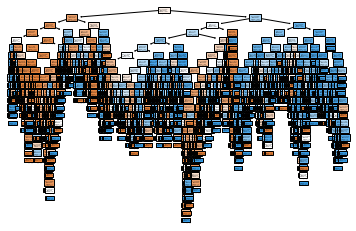

In [68]:
from sklearn import tree
tree.plot_tree(dt_clf,filled=True)

# Random forest

In [77]:
#import the package
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier()


In [78]:
#fit the model
rmf=rmf.fit(X_train,Y_train)

In [81]:
#predict on test data
y_pred=rmf.predict(X_test)

In [82]:
#check the accuracy
accuracy_score(y_pred,Y_test)*100

84.62227530606151